In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
X = np.linspace(-2, 2, 100)

In [13]:
a, b, c = 4, 5, 6

In [20]:
y = ((a * X * X) + (b * X) + c) + np.random.uniform(-2, 2, X.shape)

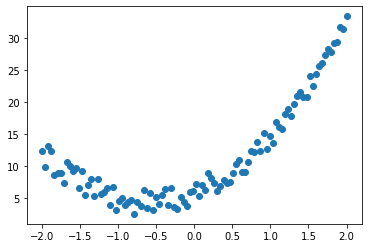

In [22]:
plt.scatter(X, y)

In [33]:
class CustomLinearReg:
    
    def __init__(self, max_iters=100, lr=.1):
        self.max_iters = max_iters
        self.lr = lr

        
    def fit(self, X, y):
        self.__X = X
        self.__ya = y
        
        self.a_ = 0
        self.b_ = 0
        self.c_ = 0
        
        errors = []
        
        for step in range(self.max_iters):
            
            ya = y
            yp = (self.a_ * X * X) + (self.b_ * X) + self.c_
            del_a = ((yp - ya) * (X * X)).mean() * self.lr
            del_b = ((yp - ya) * (X)).mean() * self.lr
            del_c = (yp - ya).mean() * self.lr
            
            self.a_-= del_a
            self.b_ -= del_b
            self.c_ -= del_c
            
            errors.append(self.calculate_error())
        
        return errors
    
    def calculate_error(self):
        yp = (self.a_ * self.__X * self.__X) + (self.b_ * self.__X) + self.c_
        return ((yp - self.__ya) ** 2).mean()
    
    def predict(self, X):
        yp = (self.a_ * X * X) + (self.b_ * X) + self.c_
        return yp.flatten()

In [34]:
model = CustomLinearReg()

In [35]:
model.fit(X, y)

[86.09070128484886,
 44.16542079689742,
 26.244475886979245,
 17.722321019920518,
 13.106152331255984,
 10.27173001133295,
 8.355022458375286,
 6.974526729974718,
 5.941575643143808,
 5.150323716244373,
 4.534430005287037,
 4.048897567029888,
 3.661694354944514,
 3.3493891111856415,
 3.094583827100048,
 2.8842487892511226,
 2.7085712302691367,
 2.560128899035384,
 2.433284842062871,
 2.3237395463184893,
 2.228197735256921,
 2.1441197456666448,
 2.0695356961548717,
 2.0029064216018835,
 1.9430192969592495,
 1.8889101149967937,
 1.8398044324404796,
 1.7950734710185017,
 1.7542009054690766,
 1.7167577994320866,
 1.6823836432618224,
 1.6507719651570585,
 1.6216593732465983,
 1.5948171746607855,
 1.5700449329762447,
 1.547165486257592,
 1.5260210680550366,
 1.5064702634651295,
 1.4883855994228135,
 1.471651618513853,
 1.456163323068199,
 1.4418249043197973,
 1.428548692388013,
 1.4162542785353616,
 1.4048677729184227,
 1.39432116986884,
 1.3845517993621264,
 1.375501848308631,
 1.3671179390

In [36]:
yp = model.predict(X)

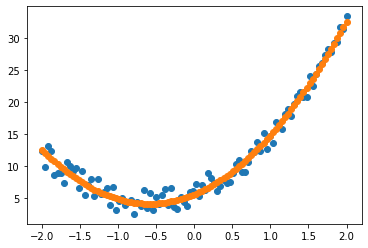

In [38]:
plt.scatter(X, y)
plt.scatter(X, yp)